<a href="https://colab.research.google.com/drive/1WXm1rDiU2-Ds3sSDMBikoiWExLZsnwOg#scrollTo=tXQbe8WhRIqG" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

#La (les) regression(s)

Dans ce chapitre, nous allons voir comment utiliser des regressions pour résoudre des problèmes numériques 

Commencons par importer les bibliothèques que nous allons utiliser 

Ici matlplotlib et pylab nous permettent de manipuler les données afin de les mettre sous forme de graphiques


In [ ]:
# import classical libraries
%matplotlib inline
%pylab inline

# avoid warnings
import warnings
warnings.filterwarnings("ignore")

# figure size
rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


### Génération des données 

Nous allons générer $y$ (notre variable de sortie) and $x$ (notre vairable d'entrée) selon le modèle suivant:
$y = \cos(x) + \epsilon$, sachant $\epsilon ~ \sim \mathcal{N}\left(0, (1/4)^2\right)$.
Nous allons le projeter afin de le visualiser l'écart entre notre modèle mathématique et les données réélles 

Text(0.5, 1.0, 'Raw data and true model')

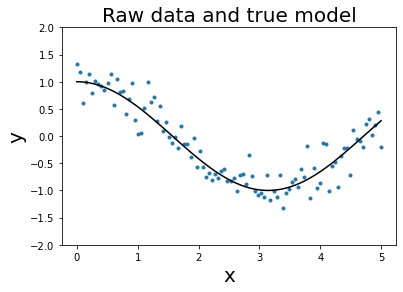

In [ ]:
# generate x and y
random.seed(10) # setting seed for reproducability
n = 100 # number of sample
x = array([linspace(0, 5, n)]).T
y = cos(x) + random.normal(0,0.25,size=shape(x))

# plot data
plot(x, y, '.')
plot(x, cos(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Raw data and true model', size=20)

### Regression linéaire simple

Dans un modèle de regression simple nous cherchons a jsuter $y = \beta_0 + \beta_1 x$ avec $\beta_0$ notre odronnées a l'origine $\beta_1$ notre coefficient directeur. Les fonction génériques de scikit-learn utilisé sont les suivantes :
- *LinearRegression()* afin de déclarer notre type de modèle de regression
- *fit()* pour ajuster le modèle et ajuster le paramtre $\beta$ 
- *predict()* Pour appliquer notre modèle appris a la variable $x$ et avoir les prévision appelées $\widehat{y}$
- *intercept_* et *coef_* permettent d'estimer notre paramettre $\widehat{\beta}$

Afin de valider notre modèle de regression il est important de savoir interpréter et mesurer les réultats. Une métrique régulièrement utilisée est la Root Mean Squared Error (RMSE) définie par : $\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(y_i - \widehat{y}_i \right)^2}$.


**A vous de jouer:**
- Ajustez la régression linéaire
- proposer un graphique du modèle appris
- Mesurer la RMSE

beta_0 = [0.60423749]
beta_1 = [[-0.30711666]]


Text(0.5, 1.0, 'Simple linear regression')

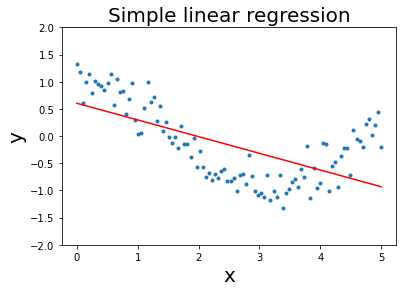

In [ ]:
# import functions
from sklearn.linear_model import LinearRegression

# adjust simple linear regression (slm) between x and y
reg_slm = LinearRegression()
reg_slm.fit(x, y)

# print beta parameters
print('beta_0 = ' + str(reg_slm.intercept_))
print('beta_1 = ' + str(reg_slm.coef_))

# use the fitted model to get predictions on x
y_slm = reg_slm.predict(x)

# plot results
plot(x, y, '.')
plot(x, y_slm, '-r')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Simple linear regression', size=20)

In [ ]:
# compute score
RMSE_slm = sqrt(mean((y - y_slm)**2))
print('RMSE(slm) = ' + str(RMSE_slm))

RMSE(slm) = 0.546508038656963


Qu'est ce qu'il est possible de conclure sur ce modèle linéaire ? 
- Daprès la représentation graphique
- D'après les métriques mésurées 

Que proposez vous comme moyens d'augment la precision du modèle ? 

### Régression linéaire multiple

Comme nous l'avons montré précédemment, si nous utilisons uniquement x et la régression linéaire, nous ne sommes pas en mesure d'ajuster correctement les données. Ainsi, nous proposons de générer de nouveaux prédicteurs en utilisant différentes puissances de $x$ telles que $x^1$, $x^2$, $\dots$, $x^{15}$. Ils seront stockés dans la matrice $X$. Ensuite, nous allons appliquer la régression linéaire entre $X$ et $y$. C'est ce qu'on appelle la régression linéaire multiple (ici, la régression polynomiale). Le modèle est donné par $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_{15} x^{15}$.



**A vous de jouer:**
- Ajustez la régression linéaire multiple et calculez la RMSE
- Comparez les résultats à ceux de la régression linéaire simple (selon les présentation de votre choix 

RMSE(mlr) = 0.22412605778670416


Text(0.5, 1.0, 'Multiple linear regression')

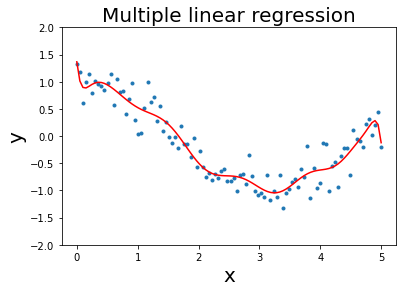

In [ ]:
# generate X matrix
X=zeros((n, 15))
for i in range(15):
    X[:,i] = ravel(x**(i+1))
    
# adjust multiple linear regression (mlr) between X and y
reg_mlr = LinearRegression()
reg_mlr.fit(X, y)
y_mlr = reg_mlr.predict(X)

# compute score
RMSE_mlr = sqrt(mean((y - y_mlr)**2))
print('RMSE(mlr) = ' + str(RMSE_mlr))

# plot results
plot(x, y, '.')
plot(x, y_mlr, '-r')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Multiple linear regression', size=20)

### Validation croisée pour choisir le meilleur nombre de paramètres

Dans les exemples précédents, nous avons vu que si nous ajoutons des composantes, nous réduisons le score RMSE. Mais, comme nous utilisons les mêmes ensembles de données pour ajuster et tester le modèle, il se peut que nous surajustons les données... Pour tester cela et évaluer le nombre optimal de composnates dans la régression linéaire multiple, nous proposons d'utiliser la procédure de validation croisée suivante :
- diviser le jeu de données de façon aléatoire (2/3 pour l'apprentissage et 1/3 pour le test) pour chaque itération
- utiliser 1000 itérations
- calculer la médiane de la RMSE des 1000 itérations.

Cette procédure est facile à mettre en œuvre dans scikit-learn en utilisant *ShuffleSplit()* et *cross_val_score()*.


**Questions:**
- Déclarer la validation croisée
- Calculer le RMSE pour chaque degré du polynôme par validation croisée
- Appliquer la régression avec le nombre optimal de degrés pour la régression polynomiale
- Tracer et comparer cet ajustement au vrai modèle

Text(0.5, 1.0, 'Cross-validation')

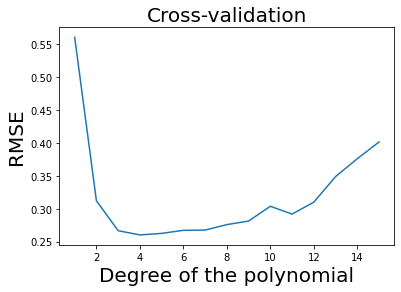

In [ ]:
# import functions
from sklearn.model_selection import cross_val_score, ShuffleSplit

# declare the cross-validation procedure (cvp)
cvp = ShuffleSplit(n_splits=1000, test_size=1/3, train_size=2/3)

# example of computed RMSE on 100 cross-validations using multiple linear regression
RMSE = sqrt(-cross_val_score(reg_mlr, X, y, scoring='neg_mean_squared_error', cv=cvp))

# define the number of degrees between 1 and 15
n_degrees = 15
degrees = range(1, 16)

# loop on number of predictors and compute mean RMSE
tab_RMSE_mlr = zeros(n_degrees)
for i in range(n_degrees):
    tab_RMSE_mlr[i] = mean(sqrt(-cross_val_score(reg_mlr, X[:,0:degrees[i]], y, scoring='neg_mean_squared_error', cv=cvp)))

# plot results
plot(degrees, tab_RMSE_mlr)
xlabel('Degree of the polynomial', size=20)
ylabel('RMSE', size=20)
title('Cross-validation', size=20)

Text(0.5, 1.0, 'Multiple linear regression')

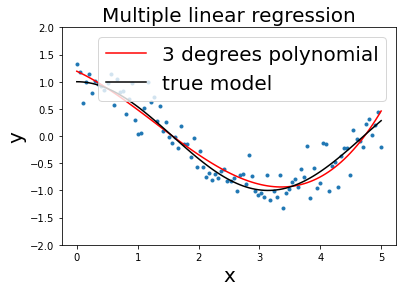

In [ ]:
# apply polynomial regression with 3 degrees
reg_mlr = LinearRegression()
reg_mlr.fit(X[:,0:3], y)
y_mlr = reg_mlr.predict(X[:,0:3])

# plot results
plot(x, y, '.')
line1, = plot(x, y_mlr, '-r')
line2, = plot(x, cos(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
legend([line1, line2], ['3 degrees polynomial', 'true model'], prop={'size': 20})
title('Multiple linear regression', size=20)

### Régression Lasso

Une autre façon de sélectionner le modèle optimal consiste à utiliser la régression Lasso. Lasso ajoute une contrainte dispersée sur les paramètres de $\beta$ et essaie de trouver les paramètres de $\beta$ qui minimisent : $\sum_{i=1}^n \left( y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{i,j} \right)^2 + \alpha\sum_{j=1}^p \left| \beta_j \right|$.


**A vous de jouer:**
- Générer $\alpha = (10^{-4}, 10^{-3}, 10^{-2}, 10^{-1}, 1)$.
- Pour chaque alpha, calculez le RMSE meadien par validation croisée
- Pour le meilleur paramètre alpha, examinez les paramètres $\beta$ estimés
- Tracer et comparer cet ajustement au vrai modèle

Text(0.5, 1.0, 'Cross-validation')

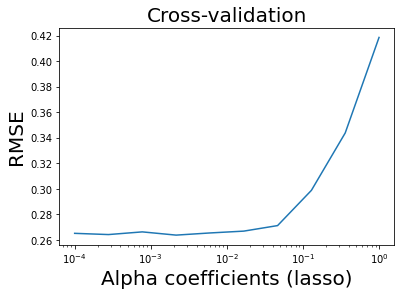

In [ ]:
# import functions
from sklearn.linear_model import Lasso

# define the alphas between 10^(-4) and 1
n_alphas = 10
alphas = logspace(-4, 0, n_alphas)

# loop on the alpha parameters and compute mean RMSE
tab_RMSE_lasso = zeros(n_alphas)
for i in range(n_alphas):
    reg_lasso = Lasso(alphas[i])
    tab_RMSE_lasso[i] = mean(sqrt(-cross_val_score(reg_lasso, X, y, scoring='neg_mean_squared_error', cv=cvp)))

# plot results
plot(alphas, tab_RMSE_lasso)
xscale('log')
xlabel('Alpha coefficients (lasso)', size=20)
ylabel('RMSE', size=20)
title('Cross-validation', size=20)

beta: [-4.86585702e-01 -2.21945900e-01  2.91983712e-02  5.32229634e-03
  4.93619668e-04  2.59262503e-05 -1.73484263e-06 -8.06122297e-07
 -1.62669775e-07 -2.63305146e-08 -3.96969553e-09 -6.40891538e-10
 -1.27478980e-10 -3.14949031e-11 -8.60201718e-12]


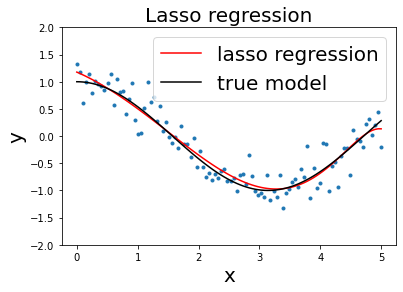

In [ ]:
# adjust lasso regression between X and y
reg_lasso = Lasso(alpha=0.001)
reg_lasso.fit(X, y)
y_lasso = reg_lasso.predict(X)

# print beta parameters
print('beta: ' + str(reg_lasso.coef_))

# plot results
plot(x, y, '.')
line1, = plot(x, y_lasso, '-r')
line2, = plot(x, cos(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Lasso regression', size=20)
legend([line1, line2], ['lasso regression', 'true model'], prop={'size': 20})

### Arbre et Regression forest

Maintenant, nous proposons d'utiliser des méthodes de régression non linéaire. Dans ce cas, nous **n'utiliserons plus X** (la matrice avec les 15 degrés du polynôme) mais nous **seulement x** (le vecteur d'entrée initial). Nous testons d'abord l'arbre de régression. Un paramètre important dans cette technique est la profondeur de l'arbre : vous optimiserez ce paramètre par validation croisée. Ensuite, nous construirons une regression forest et tracerons les valeurs prédites.


**A vous de jouer:**
- Trouvez la profondeur optimale de l'arbre par validation croisée en utilisant le paramètre *max_depth* de *DecisionTreeRegressor()*.
- Dessinez l'arbre de régression correspondant
- Construire une forêt de régression avec 1000 arbres en utilisant le paramètre *n_estimators* de *RandomForestRegressor()*.
- Tracer et comparer cet ajustement à l'état vrai

Text(0.5, 1.0, 'Cross-validation')

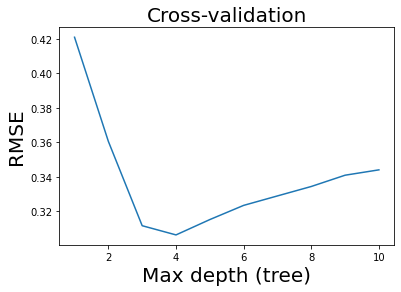

In [ ]:
# import functions
from sklearn.tree import DecisionTreeRegressor

# define the max depths between 1 and 10
n_depths = 10
depths = linspace(1, 10, n_depths)

# loop on the max_depth parameter and compute median RMSE
tab_RMSE_tree = zeros(n_depths)
for i in range(n_depths):
    reg_tree = DecisionTreeRegressor(max_depth=depths[i])
    tab_RMSE_tree[i] = median(sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)))

# plot results
plot(depths, tab_RMSE_tree)
xlabel('Max depth (tree)', size=20)
ylabel('RMSE', size=20)
title('Cross-validation', size=20)

In [ ]:
# if needed, install library using pip
#!pip install python-graphviz

# import functions
from sklearn.tree import export_graphviz
from graphviz import Source

# adjust regression tree with optimal depth
reg_tree = DecisionTreeRegressor(max_depth=4)
reg_tree.fit(x, y)
y_tree = reg_tree.predict(x)

# export the tree to "plot_tree.pdf"
plot_tree = export_graphviz(reg_tree, out_file=None) 
graph = Source(plot_tree) 
graph.render("plot_tree")

'plot_tree.pdf'

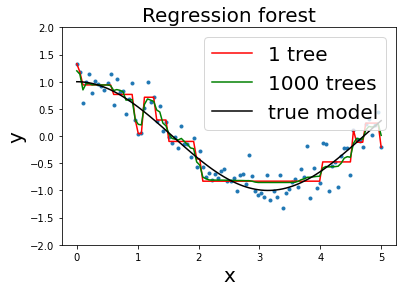

In [ ]:
# import functions
from sklearn.ensemble import RandomForestRegressor

# adjust regression forest between X and y using 1000 trees
reg_forest = RandomForestRegressor(n_estimators=1000, max_depth=4)
reg_forest.fit(x, y)
y_forest = reg_forest.predict(x)

# plot results
plot(x, y, '.')
line1, = plot(x, y_tree, '-r')
line2, = plot(x, y_forest, '-g')
line3, = plot(x, cos(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Regression forest', size=20)
legend([line1, line2, line3], ['1 tree', '1000 trees', 'true model'], prop={'size': 20})

### Régression linéaire locale

Super, vous êtes maintenant un expert en science des données sur scikit learn ! C'est maintenant à votre tour de coder une méthode. Je vous propose de coder la régression linéaire locale. Malheureusement, cette méthode de régression non linéaire n'est pas fournie par scikit-learn.



**A vous de jouer :**
- Coder la régression linéaire locale
- Ajuster la régression linéaire locale avec $\lambda=0.2$.
- Tracer et comparer cet ajustement au vrai modèle

In [ ]:
# function to compute weights using a Gaussian kernel
def compute_weights(x_star, x, lmbda):
    
    # apply the Gaussian kernel
    w = exp((-(x_star-x)**2)/lmbda)
    
    # normalize the weights
    w = w/sum(w)
    
    # return the weights
    return w

# local linear regression function
def local_linear_regression(x, y, lmbda):
    
    # initialization
    y_llr = y*NaN
    
    # loop on samples
    for i in range(len(x)):
        
        # compute the weights
        w = compute_weights(x[i], x, lmbda)
        
        # apply the weighted regression
        reg = LinearRegression()
        reg.fit(x, y, ravel(w))
        y_llr[i] = reg.predict(array([x[i]]))
        
    # return the estimations
    return y_llr  

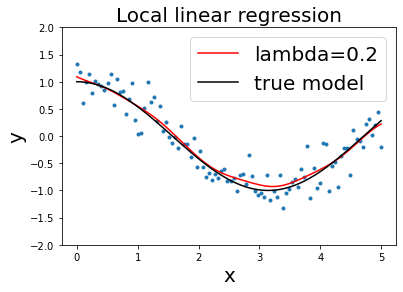

In [ ]:
# adjust local linear regression between x and y
y_llr = local_linear_regression(x, y, 0.2)

# plot results
plot(x, y, '.')
line1, = plot(x, y_llr, '-r')
line2, = plot(x, cos(x), '-k')
ylim([-2, 2])
xlabel('x', size=20)
ylabel('y', size=20)
title('Local linear regression', size=20)
legend([line1, line2], ['lambda=0.2', 'true model'], prop={'size': 20})